## Use of the Python xray Package

The xray package provides for handling of N-dimensional datasets as numpy arrays, but with each axis dimension labelled for mnemonic access and enhanced broadcasting. For more information see the xray project on Github at https://github.com/xray/xray

In [1]:
import numpy as np
import pandas as pd
import xray
xD = xray.DataArray
import matplotlib.pyplot as plt
import scipy.interpolate
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
def U_(units):
    return Q_(1.0, units)
%matplotlib inline

In [20]:
# Build a spectral transmission curve
spec_trans = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})
spatial_frequencies = xray.DataArray(np.linspace(0.0, 1000.0, 11), name='spf', attrs={'spf_units': 'cy/mm'})

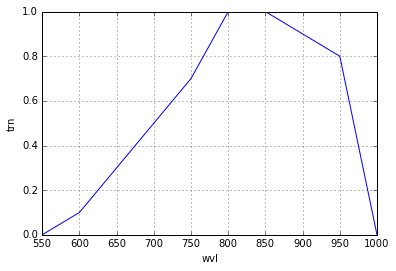

In [21]:
# Coordinate axis names are used to plot the data
spec_trans.plot()
plt.grid()

In [31]:
# Get values of a coordinate axis by name
spec_trans.coords['wvl']

<xray.DataArray 'wvl' (wvl: 9)>
array([  550.,   600.,   650.,   700.,   750.,   800.,   850.,   950.,
        1000.])
Coordinates:
  * wvl      (wvl) float64 550.0 600.0 650.0 700.0 750.0 800.0 850.0 950.0 1e+03

In [32]:
spec_trans.dims

('wvl',)

In [24]:
spec_trans.attrs['wvl_units']

'nm'

In [25]:
# Create a new wavelength grid
wvl = xray.DataArray(np.linspace(500., 1050, 51), name='wvl', attrs={'wvl_units': 'nm'})

In [26]:
wvl


<xray.DataArray 'wvl' (dim_0: 51)>
array([  500.,   511.,   522.,   533.,   544.,   555.,   566.,   577.,
         588.,   599.,   610.,   621.,   632.,   643.,   654.,   665.,
         676.,   687.,   698.,   709.,   720.,   731.,   742.,   753.,
         764.,   775.,   786.,   797.,   808.,   819.,   830.,   841.,
         852.,   863.,   874.,   885.,   896.,   907.,   918.,   929.,
         940.,   951.,   962.,   973.,   984.,   995.,  1006.,  1017.,
        1028.,  1039.,  1050.])
Coordinates:
  * dim_0    (dim_0) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
Attributes:
    wvl_units: nm

In [27]:
spc = scipy.interpolate.interp1d(spec_trans.coords['wvl'].data, spec_trans.data, kind='slinear', 
                                 bounds_error=False, fill_value=0.0)

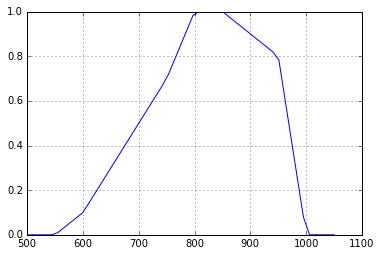

In [28]:
plt.plot(wvl.data, spc(wvl.data))
plt.grid()

In [ ]:
spec_trans.data

In [ ]:
wvl


In [29]:
x = scipy.interpolate.RegularGridInterpolator((spec_trans.coords['wvl'].data,), spec_trans.data, 
                                              bounds_error=False, fill_value=0.0)

In [30]:
x(wvl.data)

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.01 ,  0.032,  0.054,
        0.076,  0.098,  0.14 ,  0.184,  0.228,  0.272,  0.316,  0.36 ,
        0.404,  0.448,  0.492,  0.536,  0.58 ,  0.624,  0.668,  0.718,
        0.784,  0.85 ,  0.916,  0.982,  1.   ,  1.   ,  1.   ,  1.   ,
        0.996,  0.974,  0.952,  0.93 ,  0.908,  0.886,  0.864,  0.842,
        0.82 ,  0.784,  0.608,  0.432,  0.256,  0.08 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ])

In [ ]:
spec = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('refl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='refl',
                   attrs={'refl_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [ ]:
spec*spec_trans

In [ ]:
w = xray.DataArray([500.,600.,700.], name='wvl', attrs={'units': 'nm'})

In [ ]:
f = xray.DataArray([0.3, .4, .2], [(w.name, w.data)], name='filt', attrs={'units_filt': '1', 'units_'+w.name: w.attrs['units']})

In [ ]:
f

In [ ]:
from . import moglo

In [ ]:
import os


In [ ]:
os.path.abspath(os.path.curdir)

In [ ]:
tau = xD([0.9, 0.9], [('wvl', [500.0, 900.0])], name='trn', attrs={'trn': U_(''), 'wvl': U_('nm')})

In [ ]:
tau

In [ ]:
tau.plot()

In [ ]:
any(spec_trans['wvl'] < 150.0)

In [ ]:
x = Q_(1.0, 'W/m^2/sr/micrometres')

In [ ]:
'{:~}'.format(x).replace(" ", "")[3:]

In [ ]:
y = x.to('W/m**2/sr/nm')
'{:~}'.format(y.units)

In [ ]:
x.magnitude

In [15]:
# Here we have a transmission DataArray for 2 lens systems, labelled A and B
trans = xray.DataArray([[ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],
                             [ 0.0, 0.2, 0.5, 0.7, 0.72, 0.7, 0.7, 0.6, 0.5]],                      
                   [('idn', ['A', 'B']),
                    ('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '1', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [16]:
# Trapzoidal integration of an xray DataArray along a named axis
# However, this returns a regular numpy array integrated along the named axis
np.trapz(trans, axis=trans.get_axis_num('wvl'))

array([ 4.4 ,  4.37])

In [17]:
# Latter integration result is wrong because we failed to take into account the actual coordinates
# in the wavelength axis, so here we do the integration again, using the wavelength values
# as a further input
np.trapz(trans, trans['wvl'], axis=trans.get_axis_num('wvl'))

array([ 265.,  251.])

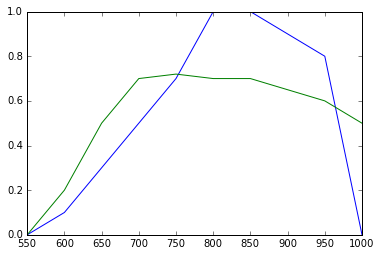

In [18]:
plt.plot(trans['wvl'], trans.loc['A'], trans['wvl'], trans.loc['B'])

In [33]:
# Index into the data using loc
trans.loc['A']

<xray.DataArray 'trn' (wvl: 9)>
array([ 0. ,  0.1,  0.3,  0.5,  0.7,  1. ,  1. ,  0.8,  0. ])
Coordinates:
    idn      |S1 'A'
  * wvl      (wvl) float64 550.0 600.0 650.0 700.0 750.0 800.0 850.0 950.0 1e+03
Attributes:
    extrap_val: 0.0
    trn_units: 1
    wvl_units: nm

In [35]:
# Attributes in the attrs dictionary turn up as top-level attributes
trans.wvl_units

'nm'

In [ ]:
spec_trans['wvl'] = np.array([1.,2,3,4,5,6,7,8,9])

In [ ]:
spec_trans

In [ ]:
xD_check_convert_units(spec_trans, 'wvl', 'nm')

In [ ]:
spec_trans = xray.DataArray([ 0.0, 0.1, 0.3, 0.5, 0.7, 1.0, 1.0, 0.8, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000])], 
                   name='trn',
                   attrs={'trn_units': '', 'wvl_units': 'nm', 'extrap_val': 0.0})

In [ ]:
from morticia.sensor import optics
# This notebook is used for development/testing of the Optics module, so auto reload the Optics module if it changes
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1

In [ ]:
x=optics.Lens(efl=[30, 'mm'], fno=1.0, trn=spec_trans)

In [ ]:
x.trn.plot()

In [ ]:
import os

In [ ]:
os.path.abspath(os.curdir)